### This set of tutorial is based on this github repository: https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/201_torch_numpy.py

#### Special thanks to the author Morvan Zhou

## 1.  Pytorch for Regression

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [20]:
## Define dataset

x = torch.unsqueeze(torch.linspace(-1,1,100), dim = 1)
x.shape

y = x.pow(3) + 0.2*torch.rand(x.size())
y.shape

torch.Size([100, 1])

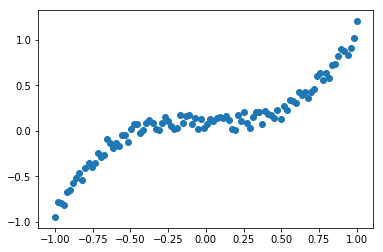

In [21]:
## Build the Pytorch variable

x, y = Variable(x), Variable(y)

## show them

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [27]:
## Now a real Pytroch !!!

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
        
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [28]:
net = Net(n_feature = 1, n_hidden = 10, n_output = 1)
print (net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [30]:
## Train it

optimizer = torch.optim.SGD(net.parameters(), lr = 0.5)
loss_func = torch.nn.MSELoss()

/Users/charliedang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  from ipykernel import kernelapp as app


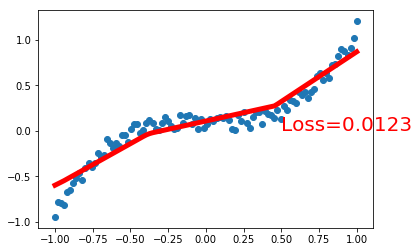

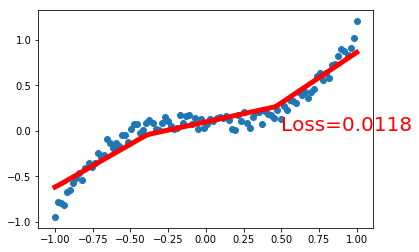

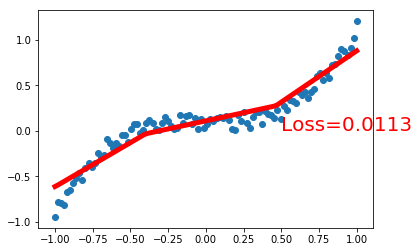

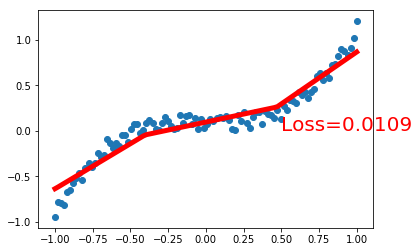

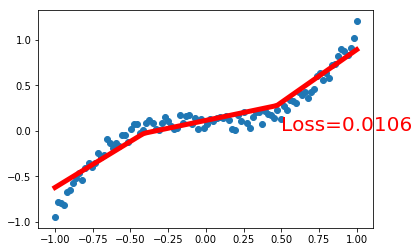

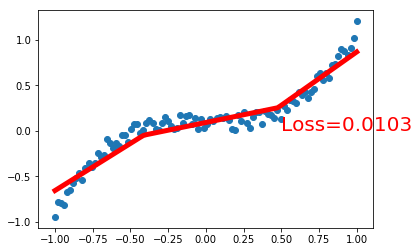

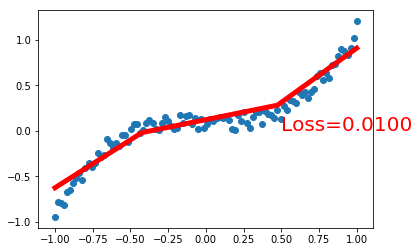

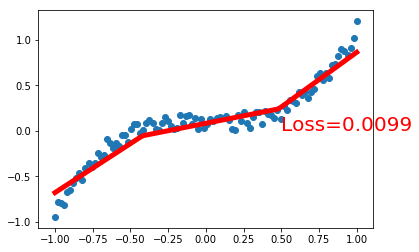

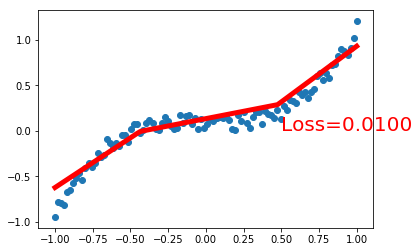

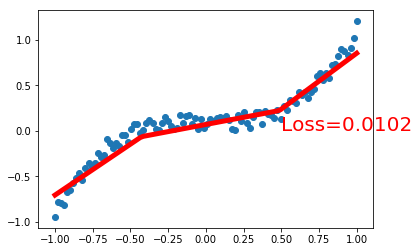

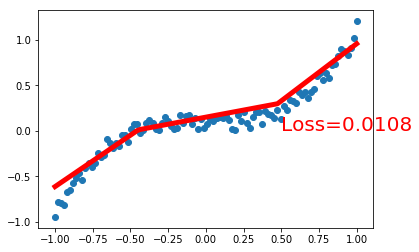

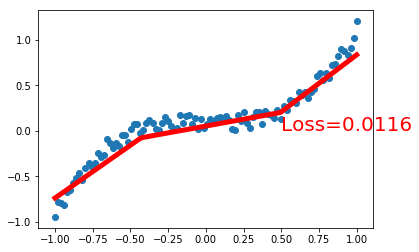

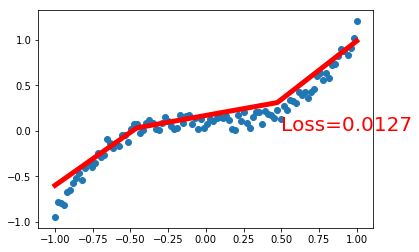

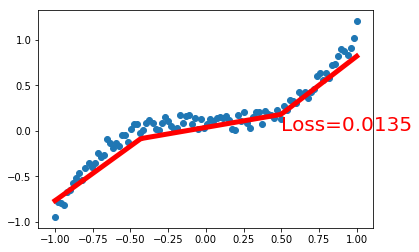

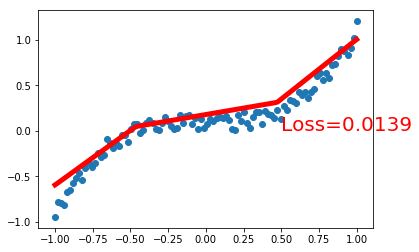

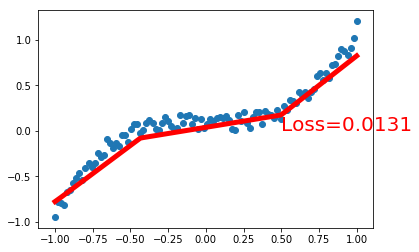

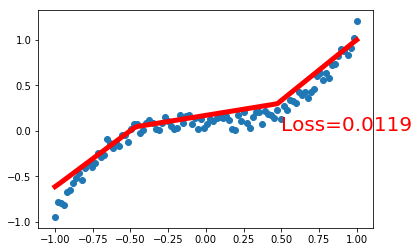

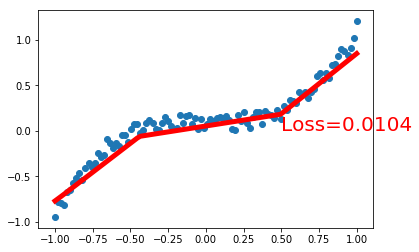

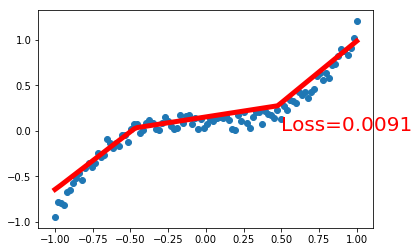

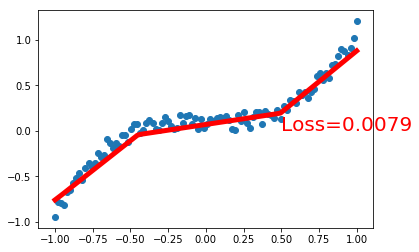

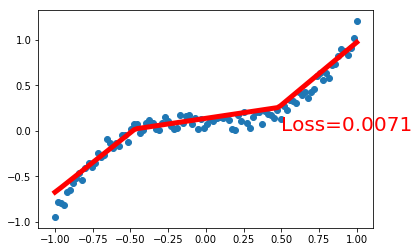

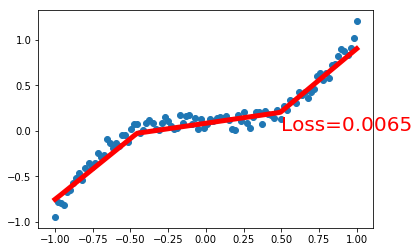

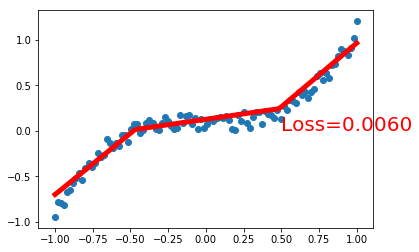

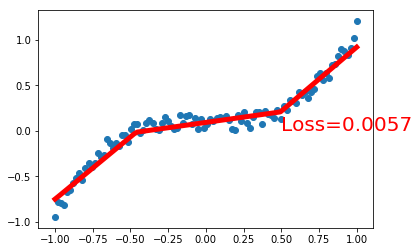

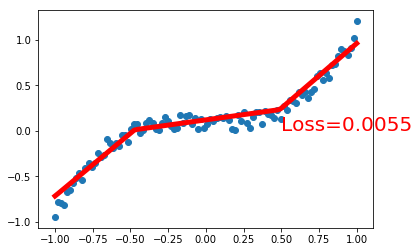

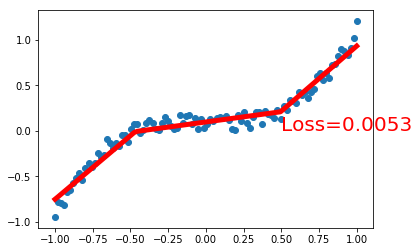

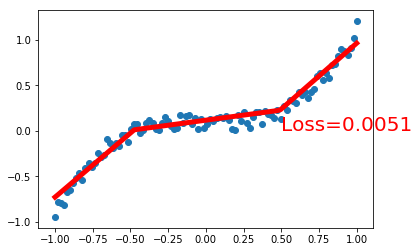

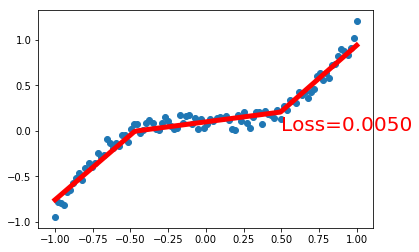

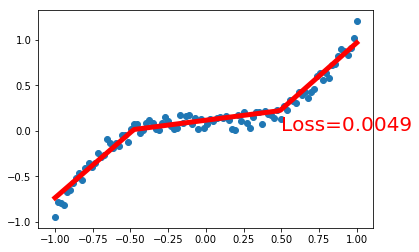

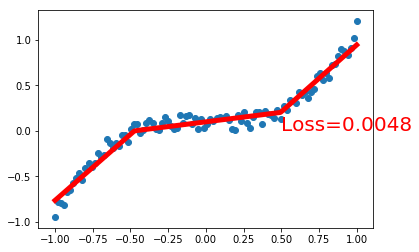

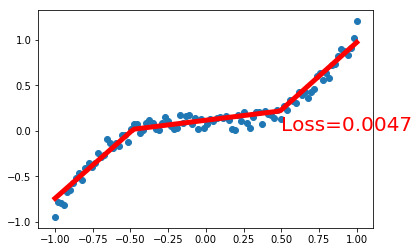

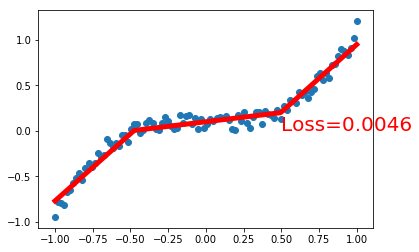

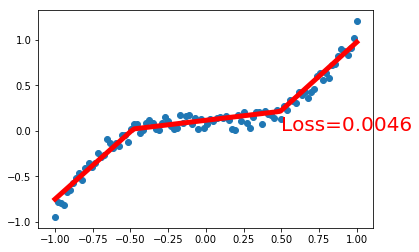

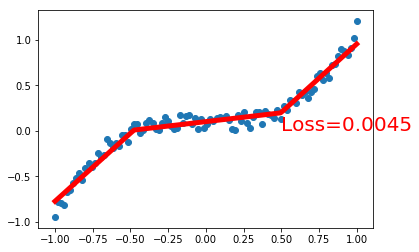

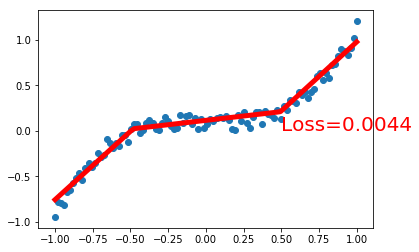

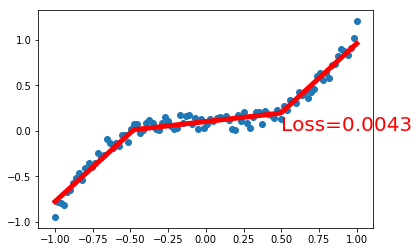

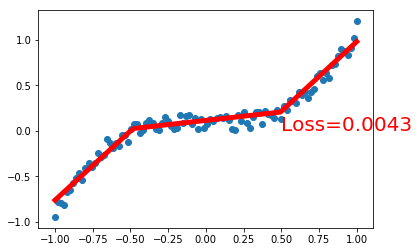

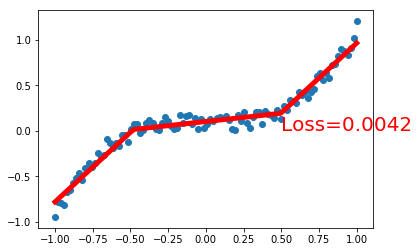

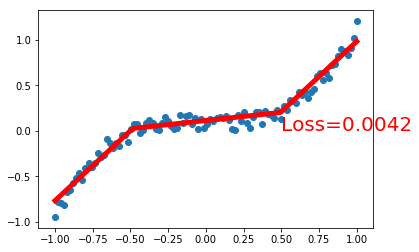

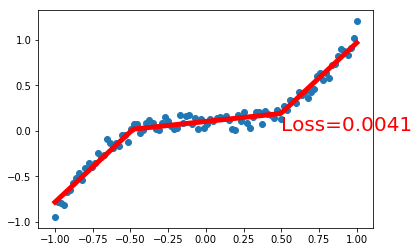

In [33]:
for t in range(200):
    prediction = net(x)  ## input x to train
    
    loss = loss_func(prediction, y)  ## prediction result and target value
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
        
plt.show()

## 2. Pytroch for claasification

In [2]:
## Data preparation

# make fake data
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # class0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                # class1 y data (tensor), shape=(100, 1)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # shape (200,) LongTensor = 64-bit integer
y = y.reshape(y.shape, 1)

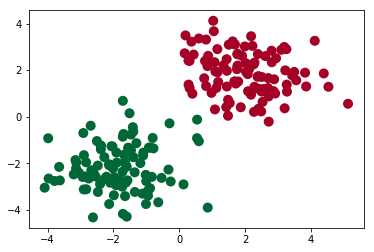

In [3]:
## Plot the data

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [4]:
## Build the model

class Net(torch.nn.Module):
    
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.out = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.out(x)
        return x
    

net = Net(n_feature = 2, n_hidden = 10, n_output = 2)
print (net)
        

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


In [5]:
optimizer = torch.optim.SGD(net.parameters(), lr = 0.02)
loss_func = torch.nn.CrossEntropyLoss()


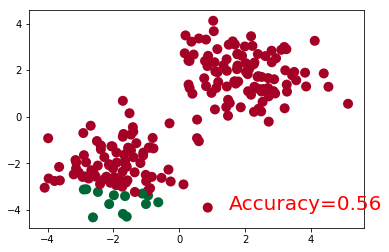

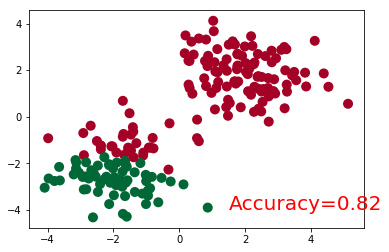

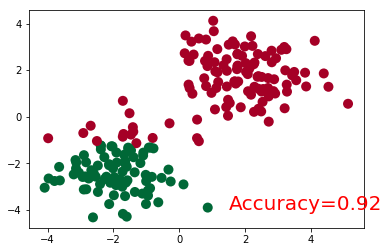

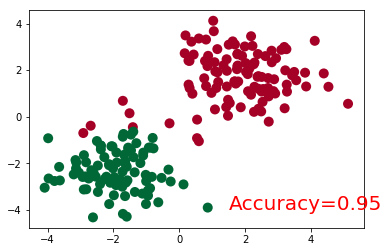

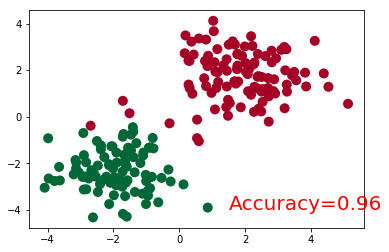

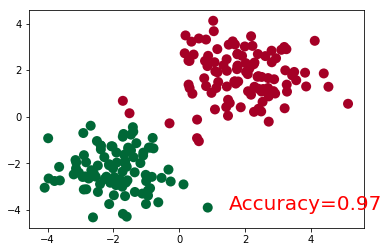

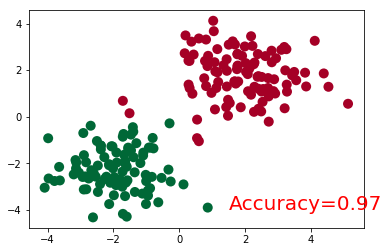

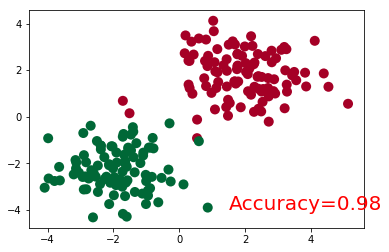

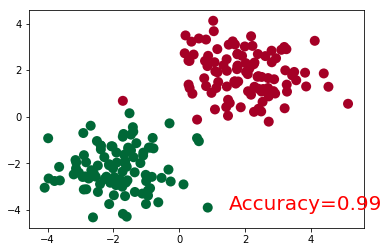

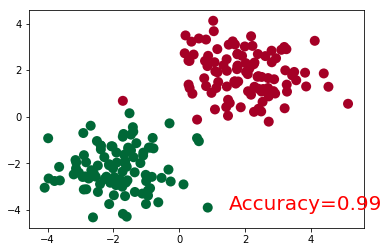

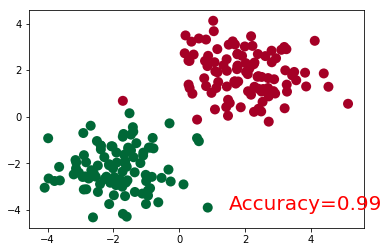

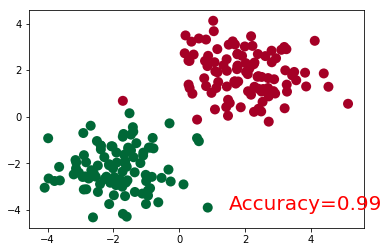

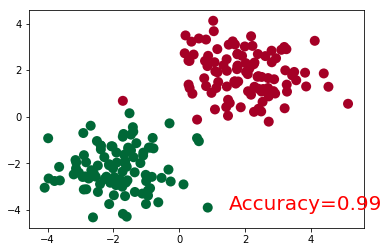

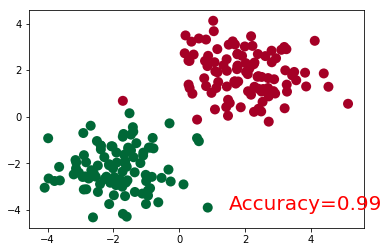

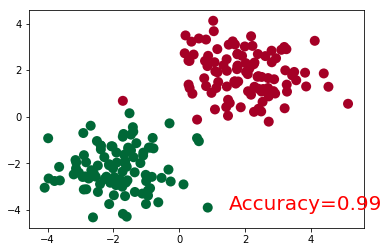

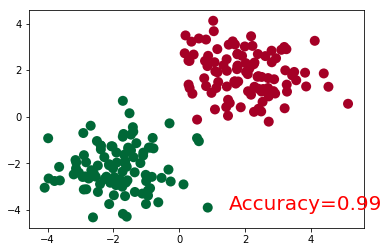

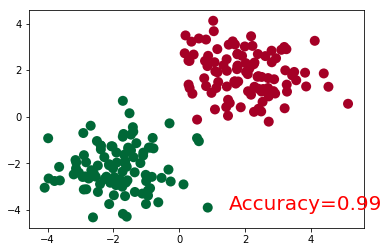

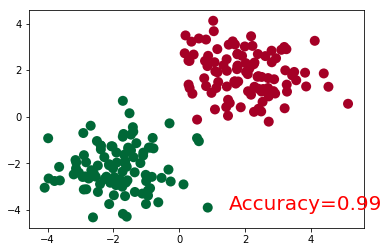

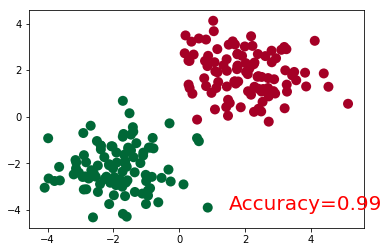

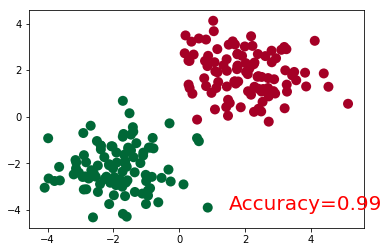

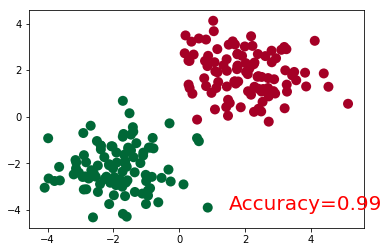

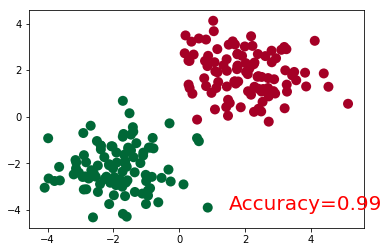

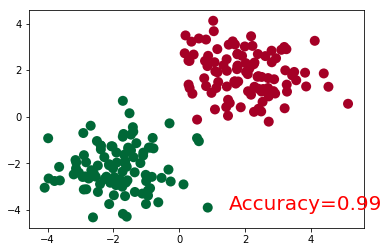

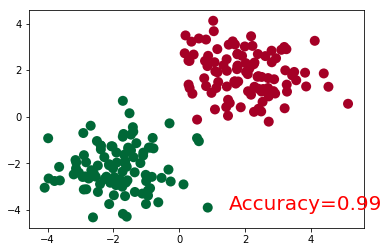

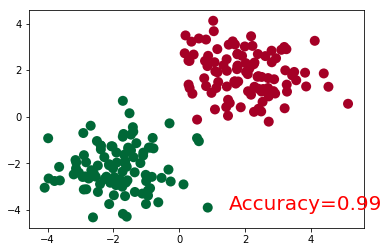

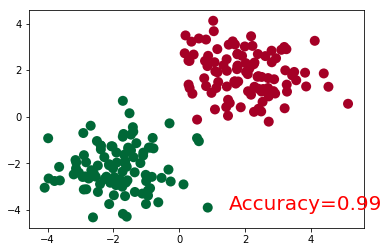

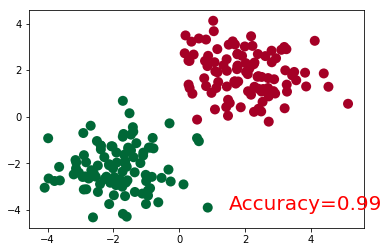

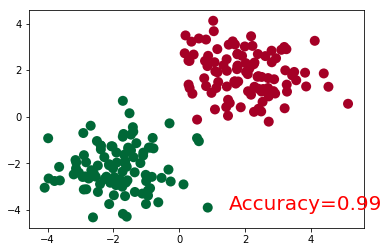

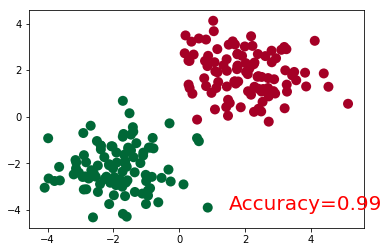

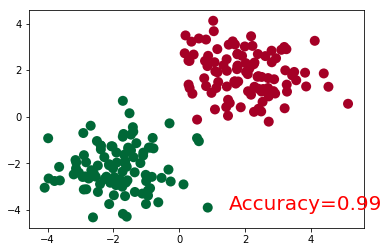

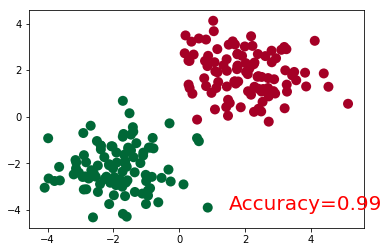

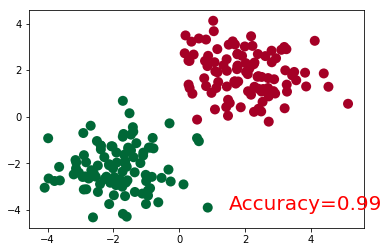

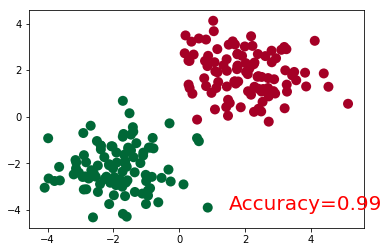

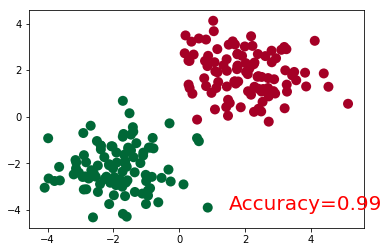

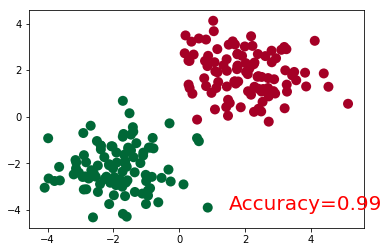

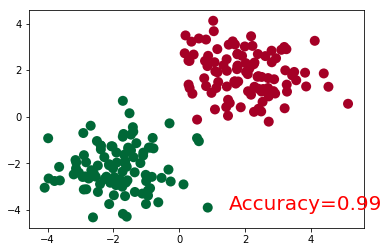

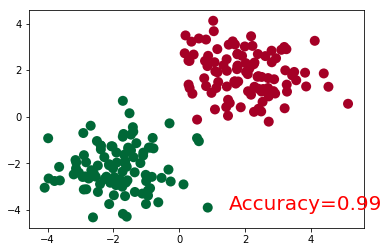

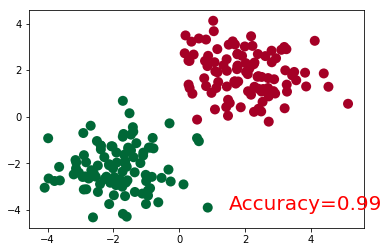

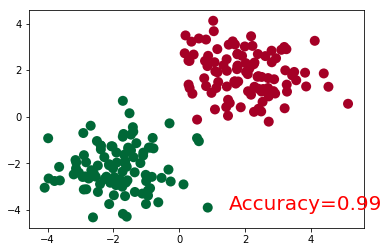

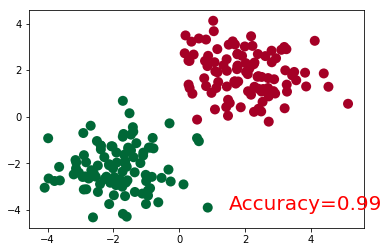

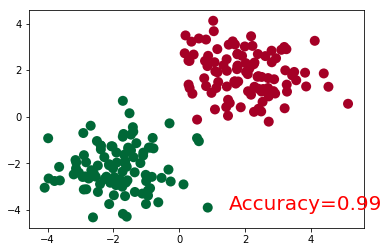

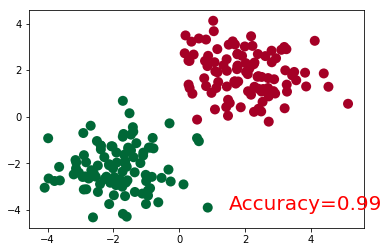

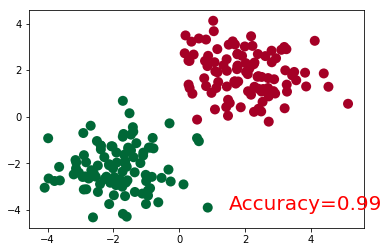

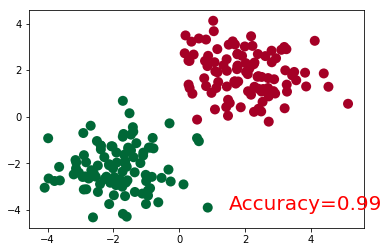

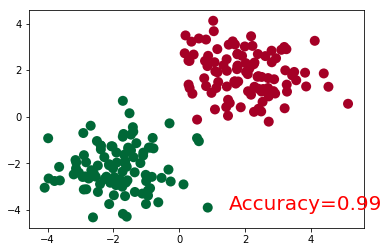

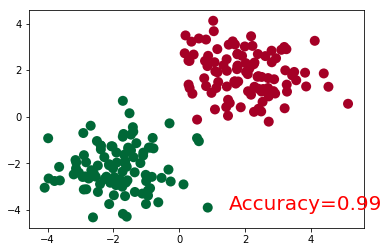

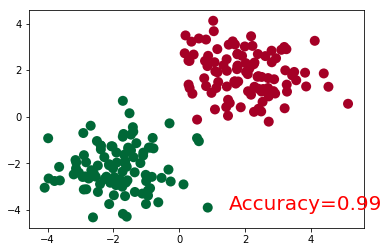

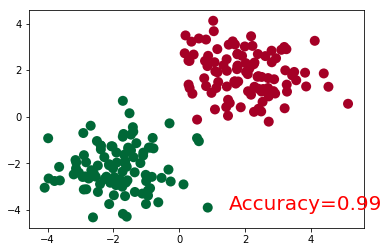

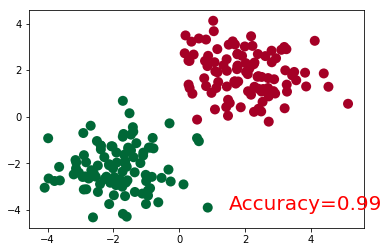

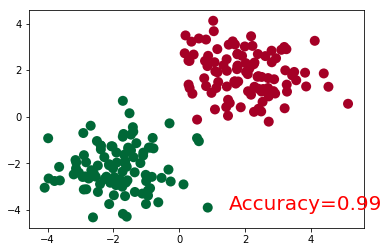

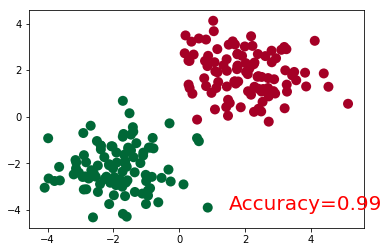

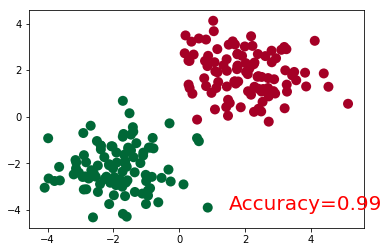

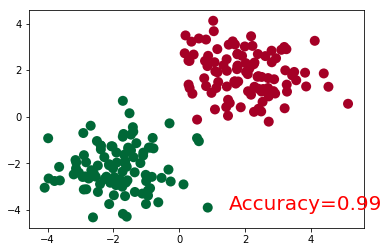

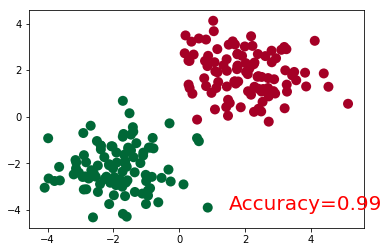

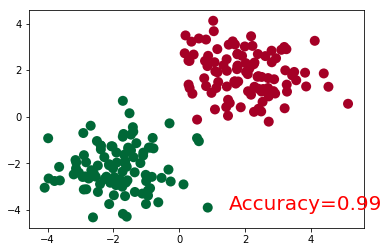

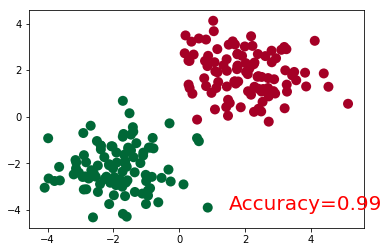

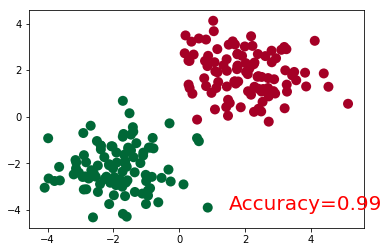

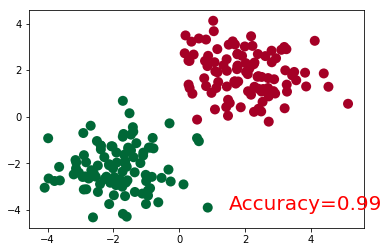

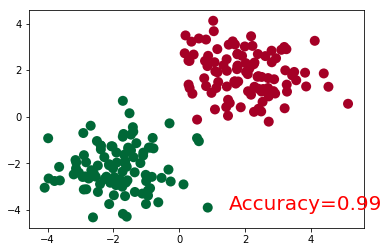

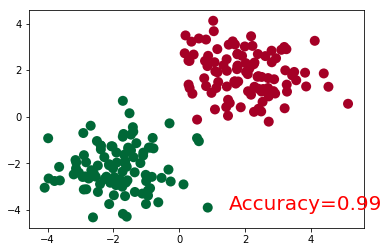

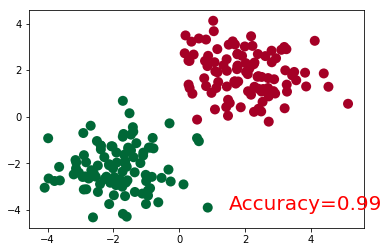

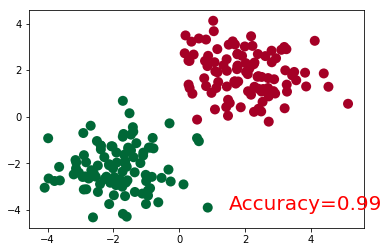

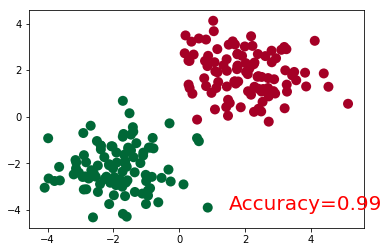

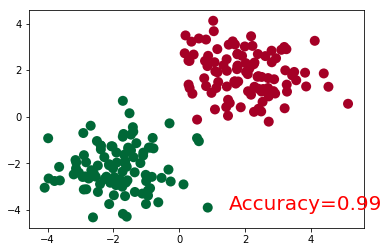

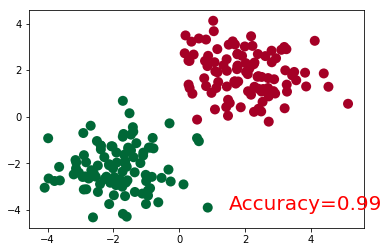

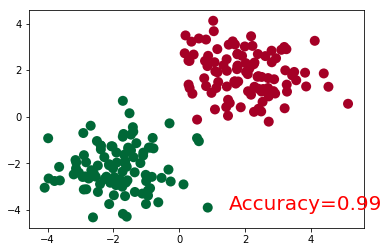

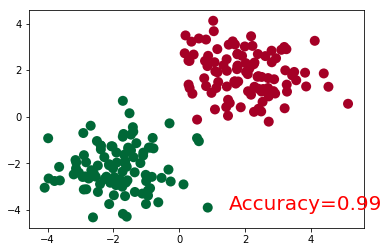

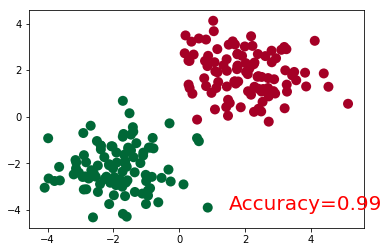

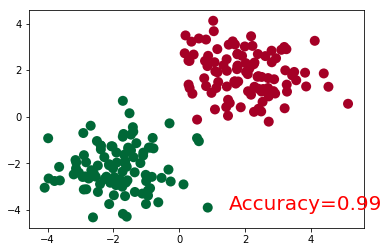

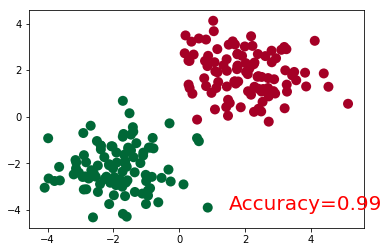

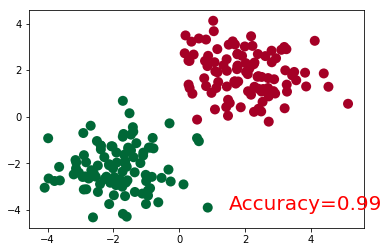

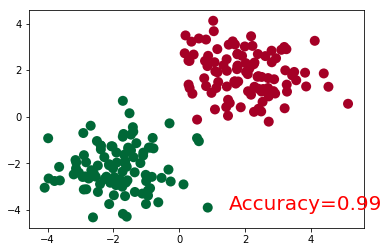

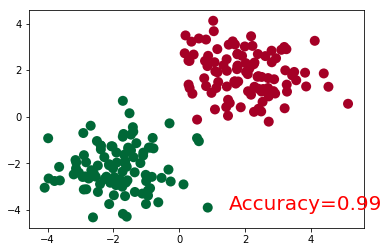

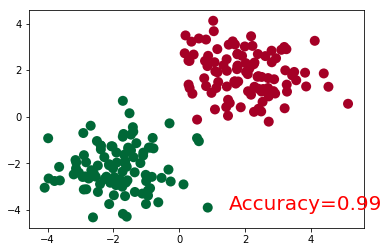

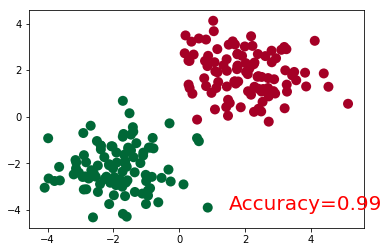

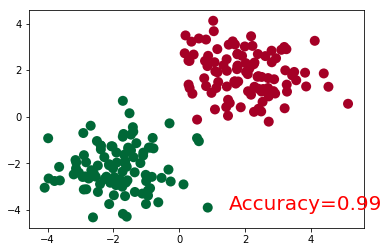

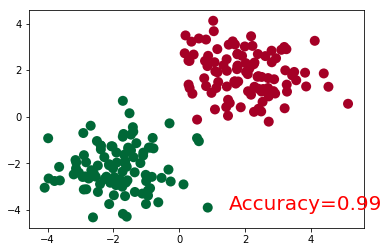

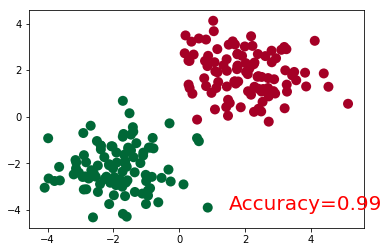

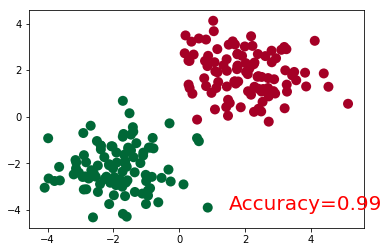

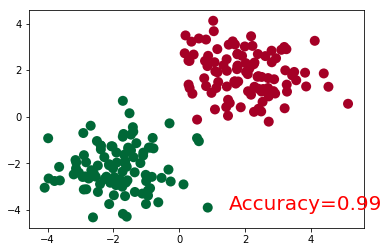

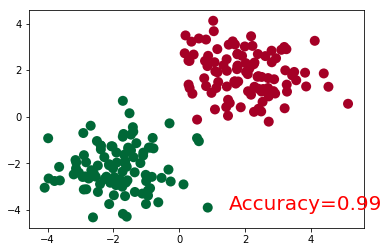

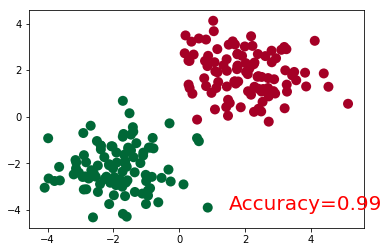

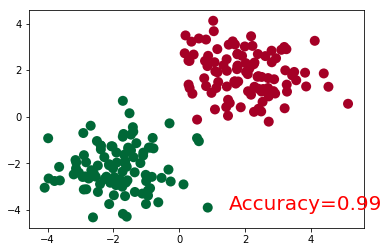

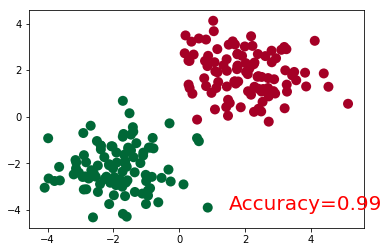

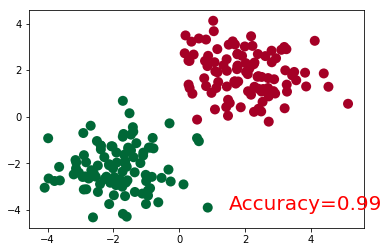

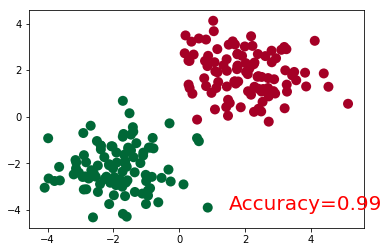

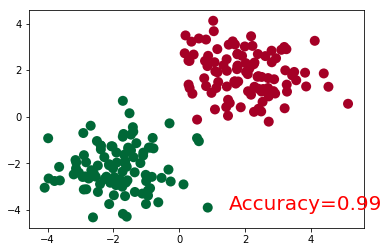

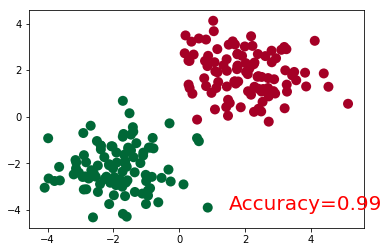

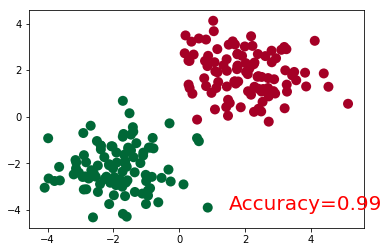

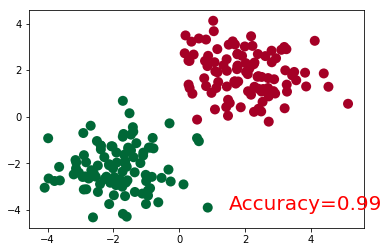

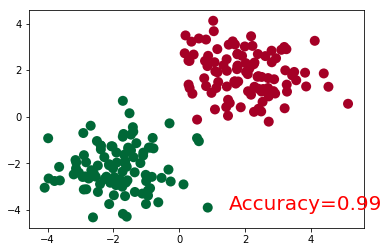

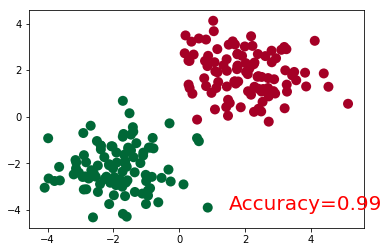

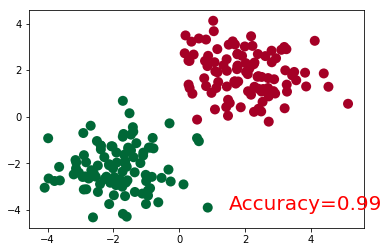

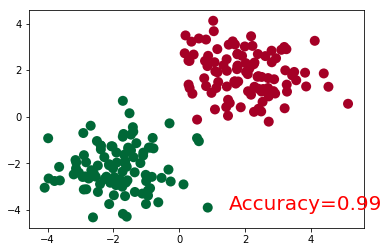

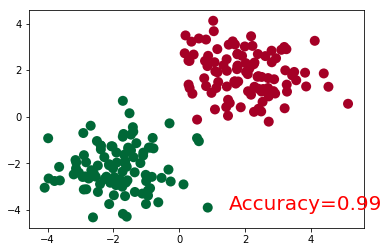

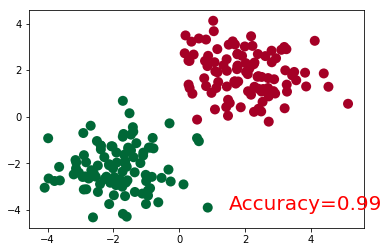

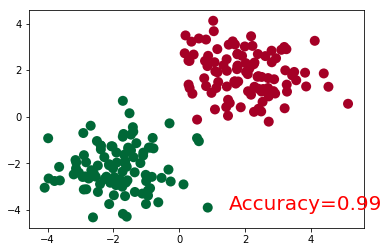

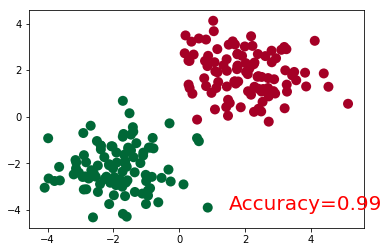

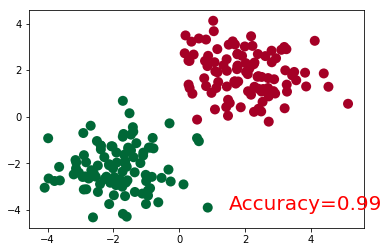

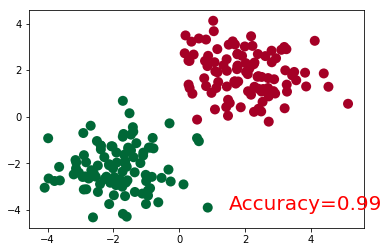

In [8]:
for iteration in range(200):
    
    prediction = net(x)
    loss = loss_func(prediction, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if iteration % 2 == 0:
        # plot and show learning process
        
        plt.cla()
        prediction = torch.max(prediction, 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
        


plt.show()

In [14]:
prediction

tensor([[ 1.8593, -1.2606],
        [ 2.1596, -1.4757],
        [ 2.2867, -1.5619],
        [ 3.1502, -2.1117],
        [ 2.7342, -1.8337],
        [ 1.9227, -1.2556],
        [ 3.3721, -2.2629],
        [ 1.4074, -0.9489],
        [ 1.5694, -1.0570],
        [ 1.0239, -0.6886],
        [ 2.0903, -1.4305],
        [ 2.5448, -1.7404],
        [ 3.5708, -2.2588],
        [ 1.5482, -1.0514],
        [ 1.2584, -0.8452],
        [ 1.1488, -0.7708],
        [ 1.7271, -1.1729],
        [ 1.7153, -1.1676],
        [ 1.3072, -0.8847],
        [ 1.0670, -0.7154],
        [ 1.8563, -1.2719],
        [ 1.5783, -1.0665],
        [ 1.2689, -0.8028],
        [ 2.1235, -1.4512],
        [ 1.1666, -0.7508],
        [ 2.0666, -1.4249],
        [ 2.5468, -1.7443],
        [ 2.7918, -1.8870],
        [ 1.8610, -1.1452],
        [ 2.2225, -1.5188],
        [ 2.0569, -1.4040],
        [ 1.6897, -1.1565],
        [ 2.2094, -1.5101],
        [ 2.9746, -2.0009],
        [ 2.2931, -1.5732],
        [ 1.9139, -1